In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Qiskit

In [2]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9e939271780036fbfa8866f53c3b8a1c19b7e0ad92d8c7b17b8b002427dbe06b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.2 MB/s eta 0:00:00


## Experiment: Not

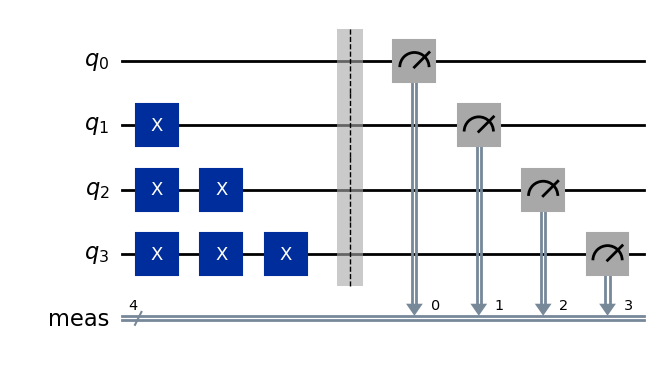

In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Create a circuit
qc = QuantumCircuit(4)
qc.x(1)
qc.x(2)
qc.x(2)
qc.x(3)
qc.x(3)
qc.x(3)

qc.measure_all()
qc.draw('mpl')

{'1010': 1024}


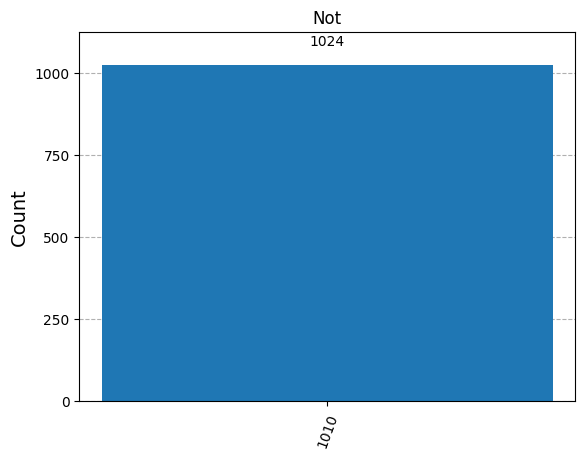

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Not')

## Experiment: Hadamard

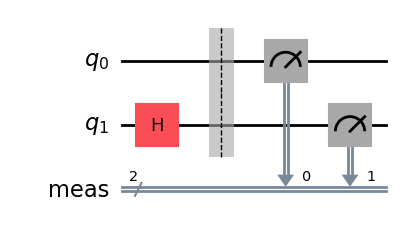

In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(1)

qc.measure_all()
qc.draw('mpl')

{'00': 489, '10': 535}


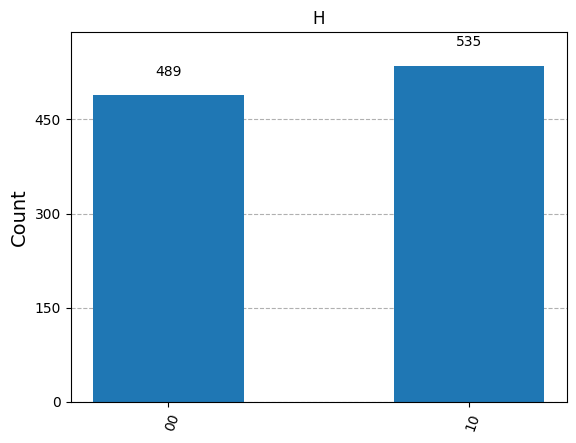

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='H')

### Two Hadamard gates

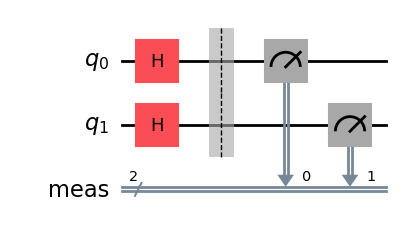

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

qc.measure_all()
qc.draw('mpl')

{'01': 258, '10': 268, '00': 249, '11': 249}


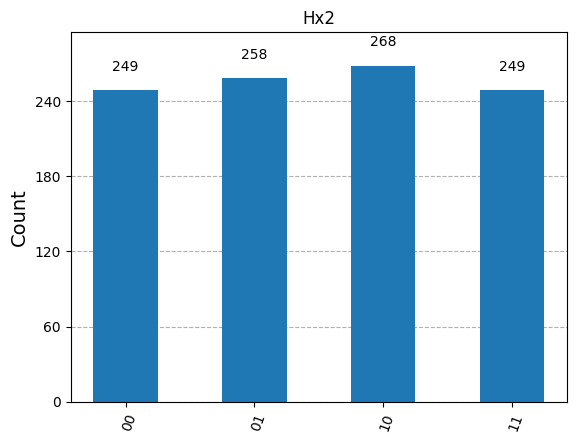

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Hx2')

### Not + Hadamard

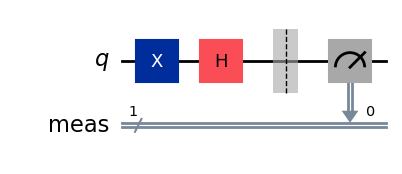

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)

qc.measure_all()
qc.draw('mpl')

{'0': 518, '1': 506}


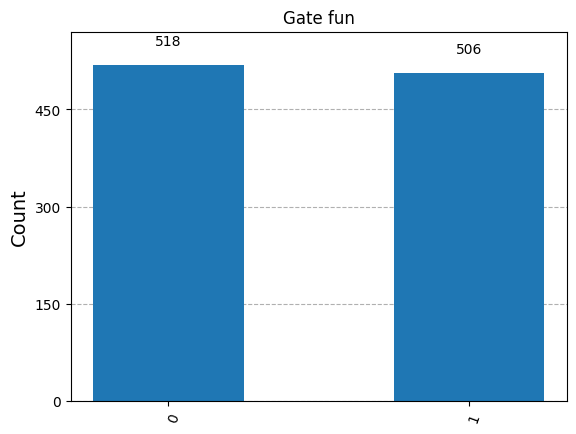

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Hadamard + Hadamard

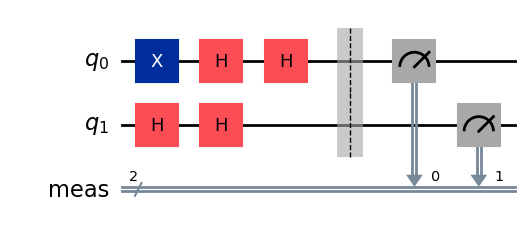

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(0)

qc.h(1)
qc.h(1)


qc.measure_all()
qc.draw('mpl')

{'01': 1024}


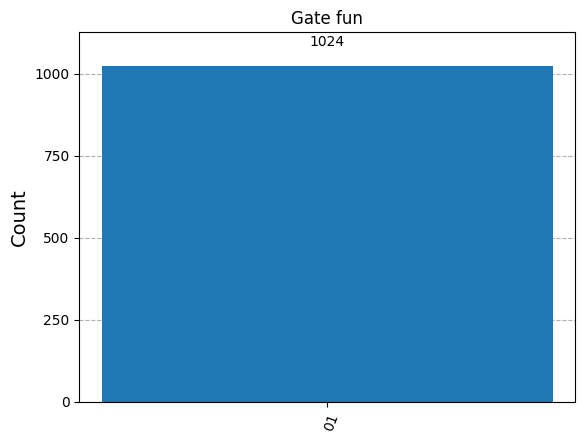

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Hadamard math

How do they know whether it should turn the superposition back to 0 or 1?

It is the phase.

* $H | 0 \rangle = \frac{1}{\sqrt{2}} | 0 \rangle + \frac{1}{\sqrt{2}} | 1 \rangle$

* $H | 1 \rangle = \frac{1}{\sqrt{2}} | 0 \rangle - \frac{1}{\sqrt{2}} | 1 \rangle$

Recall the matrix representation.

$H = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$



In [ ]:
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])

print('H @ ket0 =\n', H @ ket0)
print('H @ ket1 =\n', H @ ket1)

ketP = H @ ket0
ketN = H @ ket1

print('ketP =\n', ketP)
print('ketN =\n', ketN)

H @ ket0 =
 [[0.70710678]
 [0.70710678]]
H @ ket1 =
 [[ 0.70710678]
 [-0.70710678]]
ketP =
 [[0.70710678]
 [0.70710678]]
ketN =
 [[ 0.70710678]
 [-0.70710678]]


In [ ]:
print('H @ ketP =\n', H @ ketP)
print('H @ ketN =\n', H @ ketN)


H @ ketP =
 [[1.00000000e+00]
 [2.23711432e-17]]
H @ ketN =
 [[2.23711432e-17]
 [1.00000000e+00]]


## Experiment: C-Not

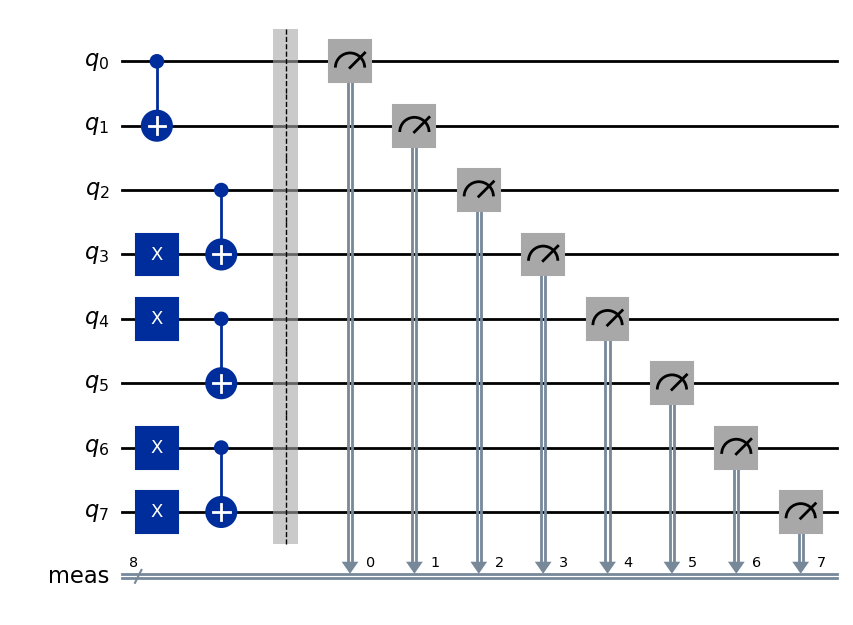

In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Create a circuit
qc = QuantumCircuit(8)
# q(0) = 0, q(1) = 0
qc.cx(0,1)

# q(2) = 0, q(3) = 1
qc.x(3)
qc.cx(2,3)

# q(4) = 1, q(5) = 0
qc.x(4)
qc.cx(4,5)

# q(6) = 1, q(7) = 1
qc.x(6)
qc.x(7)
qc.cx(6,7)

qc.measure_all()
qc.draw('mpl')

{'01111000': 1024}


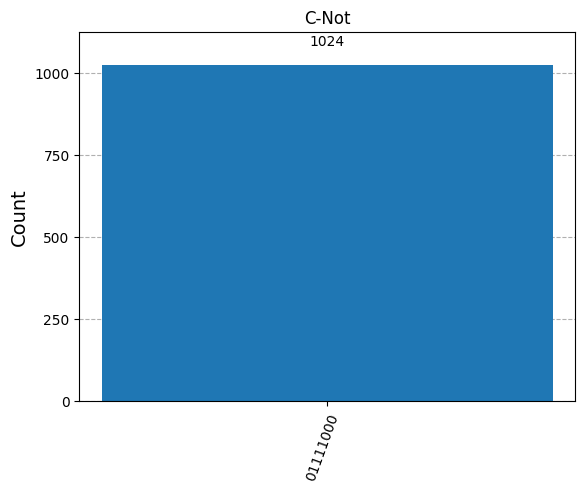

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='C-Not')

### Entanglement

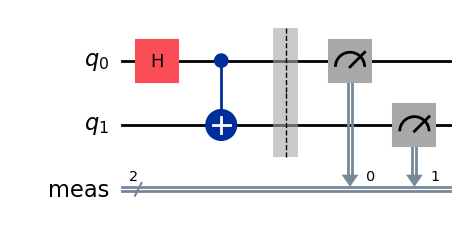

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(0)
# qc.h(1)

qc.cx(0,1)

qc.measure_all()
qc.draw('mpl')

{'11': 512, '00': 512}


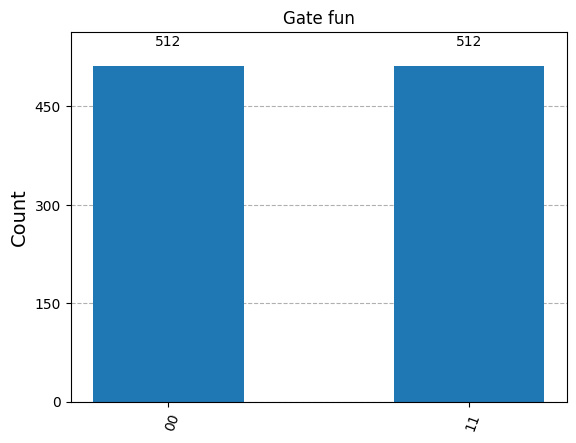

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Another entanglement

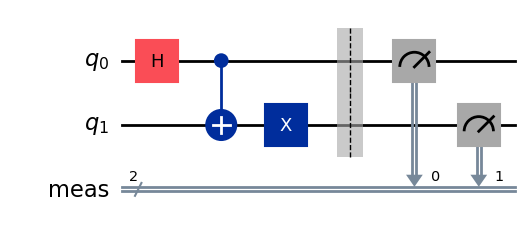

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(0)

qc.cx(0,1)
qc.x(1)

qc.measure_all()
qc.draw('mpl')

{'10': 521, '01': 503}


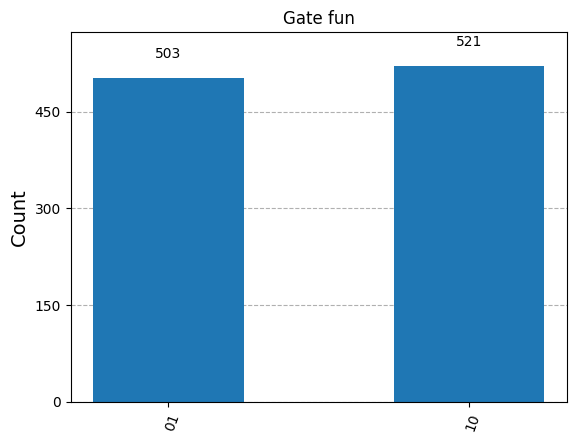

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Parallel test CNOT

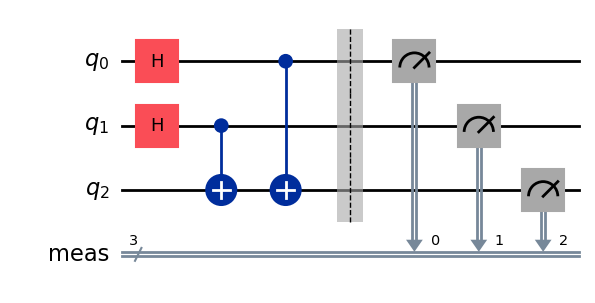

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.cx(1,2)    # q(2) = q(1)

qc.cx(0,2)    # q(0) entangles q(2)

qc.measure_all()
qc.draw('mpl')

{'110': 249, '101': 235, '011': 285, '000': 255}


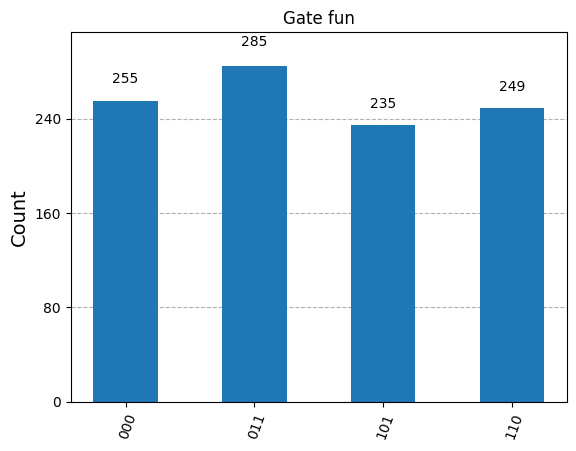

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Experiment Toffoli gate

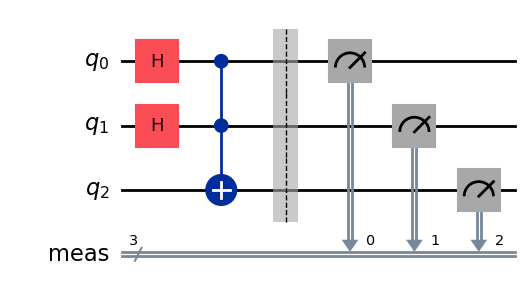

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)

qc.ccx(0,1,2)

qc.measure_all()
qc.draw('mpl')

{'001': 238, '111': 256, '000': 254, '010': 276}


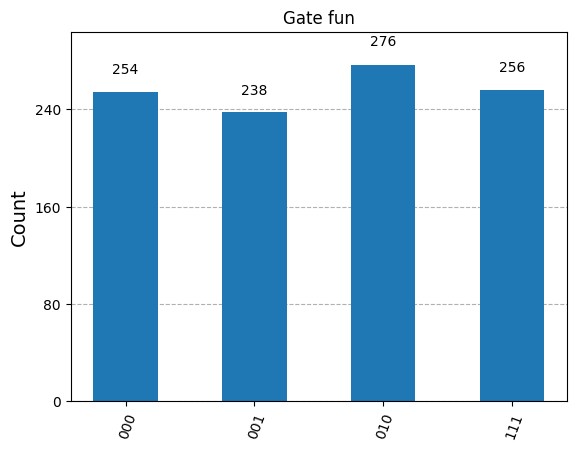

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Paralle test Toffoli

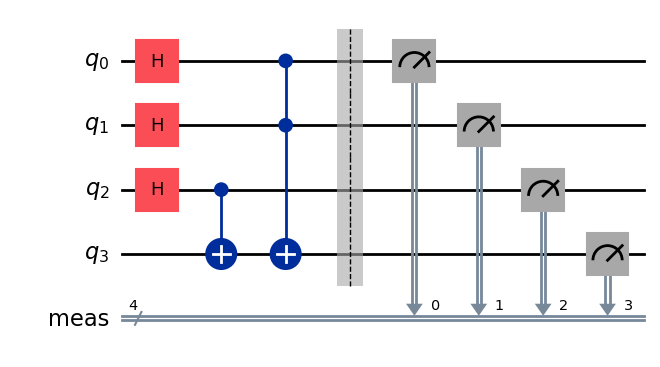

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(4)
qc.h(0)
qc.h(1)
qc.h(2)

qc.cx(2,3)

qc.ccx(0,1,3)

qc.measure_all()
qc.draw('mpl')

{'1110': 136, '0000': 125, '0010': 130, '1101': 134, '0001': 119, '0111': 136, '1011': 126, '1100': 118}


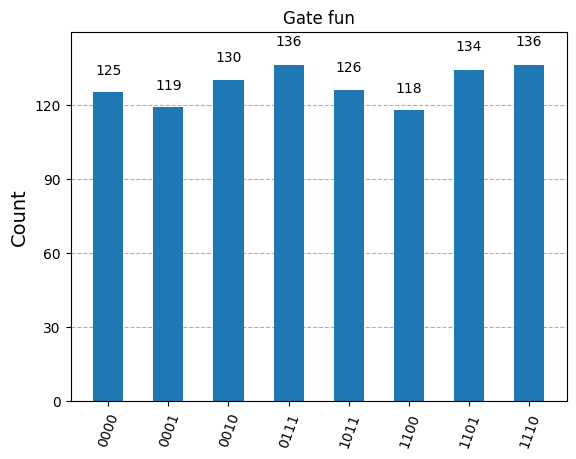

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

## Exercise: replicating classical NAND

| x1 | x0 | NAND |
|--- |--- | ---  |
| 0  | 0  | 1    |
| 0  | 1  | 1    |
| 1  | 0  | 1    |
| 1  | 1  | 0    |

All quantum operations are reversible.

NAND is irreversible!

Solution: use **ancilla qubit** (extra supporting qubit)

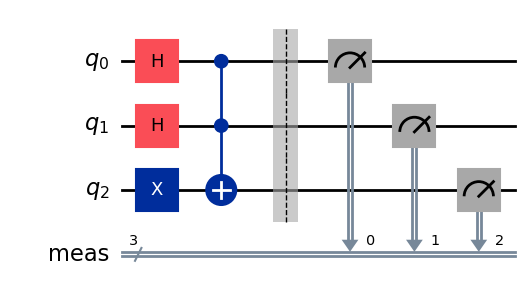

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)

# NAND
qc.x(2)
qc.ccx(0,1,2)

qc.measure_all()
qc.draw('mpl')

{'100': 246, '011': 258, '101': 254, '110': 266}


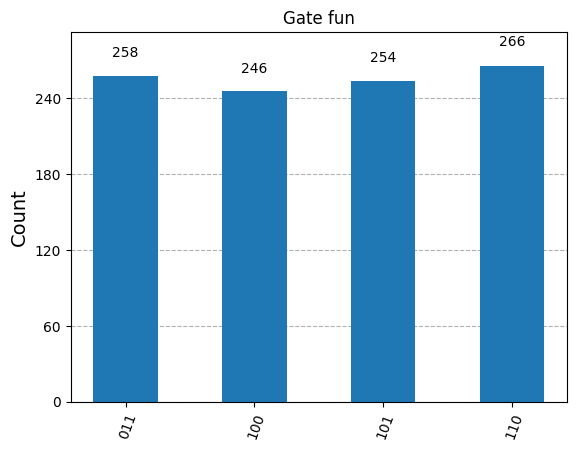

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

## Exercise: XOR

| x1 | x0 | XOR |
|--- |--- | ---  |
| 0  | 0  | 0    |
| 0  | 1  | 1    |
| 1  | 0  | 1    |
| 1  | 1  | 0    |

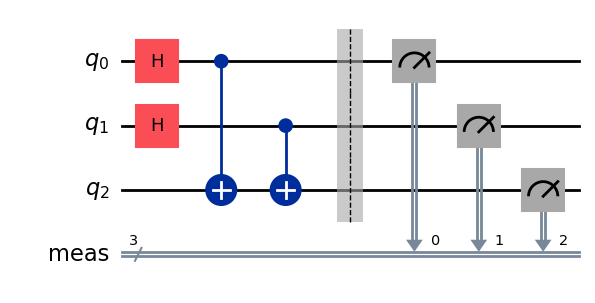

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)

# XOR
qc.cx(0,2)
qc.cx(1,2)

qc.measure_all()
qc.draw('mpl')

{'000': 232, '011': 261, '101': 263, '110': 268}


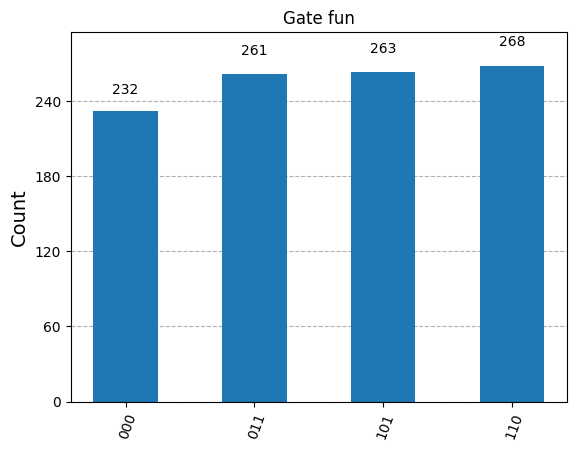

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

## Experiment: Phase

### Base case

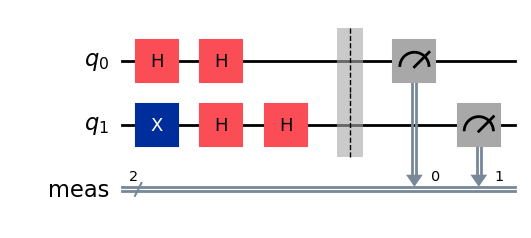

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(0) # make qc0 = both/superposition
qc.x(1)
qc.h(1)
# qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw('mpl')

{'10': 1024}


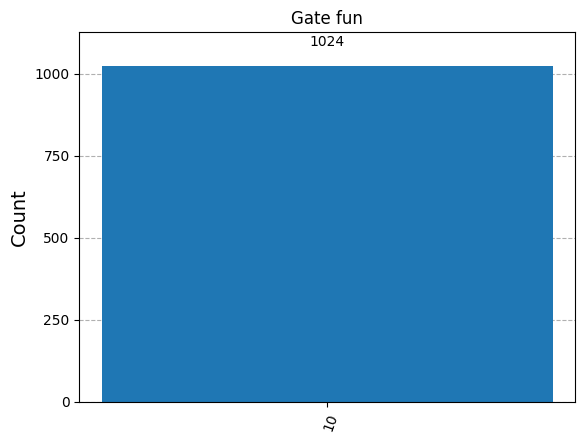

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Base case with CNOT

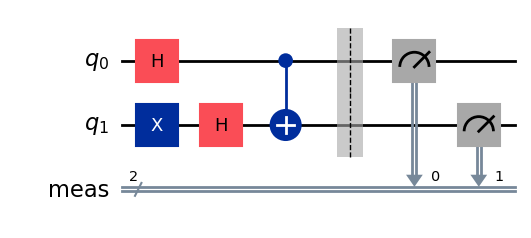

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(0) # make qc0 = both/superposition
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

{'01': 248, '10': 252, '00': 252, '11': 272}


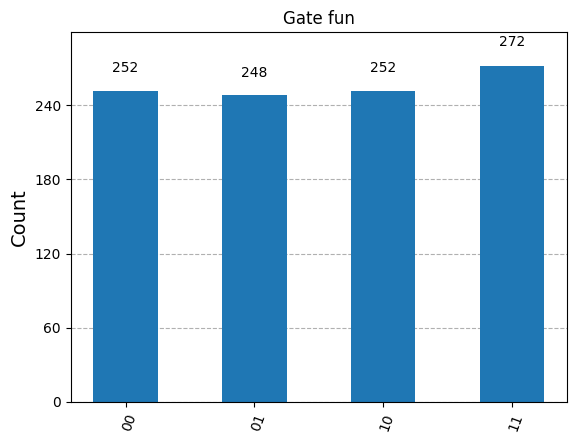

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Base case + H + CNOT

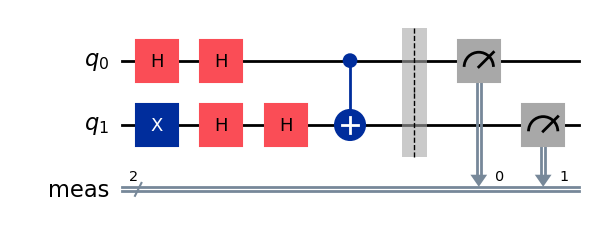

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(0) # make qc0 = both/superposition
qc.x(1)
qc.h(1)

qc.h([0,1])
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

{'10': 1024}


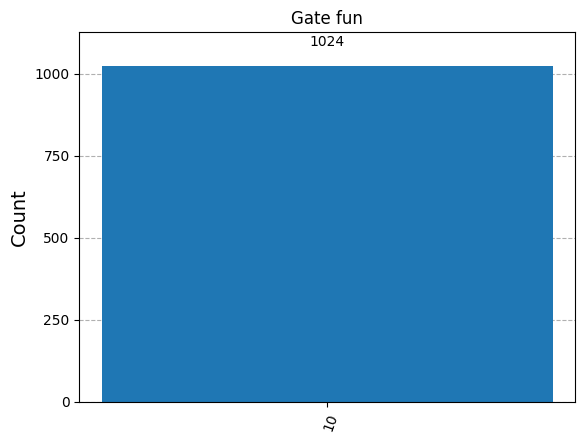

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

### Phase kickback

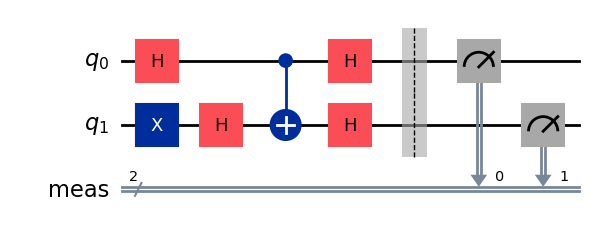

In [ ]:
# 1. Create a circuit
qc = QuantumCircuit(2)
qc.h(0) # make qc0 = both/superposition
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw('mpl')

{'11': 1024}


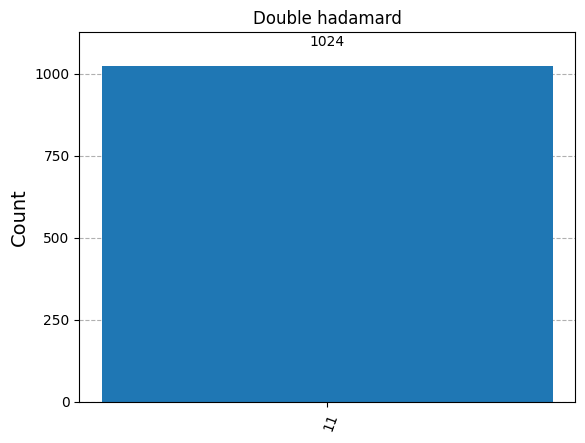

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Double hadamard')

The controlled qubit $q_1$ does not change.
But, the controller $q_0$ is changed!!!

# Phase kickback

  > **Phase kickback** is a phenomenon in quantum computing where the phase of a controlled qubit is transferred to its controlling qubit.

[Edx/U Chicago: phase kickback](https://www.youtube.com/watch?v=IcShoZmj6ik)

C-Not gate

Let $C$ be a matrix representing C-Note operator:

$$
C | c,x \rangle = \left\{ \begin{array}
\; |0,0 \rangle , \mbox{ if } c = 0 , x = 0 ,\\
   |0,1 \rangle , \mbox{ if } c = 0 , x =  1,\\
   |1,1 \rangle , \mbox{ if } c = 1 , x = 0 ,\\
   |1,0 \rangle , \mbox{ if } c = 1 , x = 1 .
\end{array}
\right.
$$

$$C = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}$$

In [ ]:
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
print(C)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [ ]:
x00 = np.array([1, 0, 0, 0])
x01 = np.array([0, 1, 0, 0])
x10 = np.array([0, 0, 1, 0])
x11 = np.array([0, 0, 0, 1])

print( C @ x00 )
print( C @ x01 )
print( C @ x10 )
print( C @ x11 )

[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]


Controlling qubit is in superposition

In [ ]:
xp0 = np.array([1, 0, 1, 0]) * 1/np.sqrt(2)  # (H I) |0,0> = |+,0>
xn0 = np.array([1, 0, -1, 0]) * 1/np.sqrt(2) # (H I) |1,0> = |-,0>

print( C @ xp0 )
print( C @ xn0 )

[0.70710678 0.         0.         0.70710678]
[ 0.70710678  0.          0.         -0.70710678]


In [ ]:
              # 00,01,10,11
xp0 = np.array([1,  0, 1, 0]) * 1/np.sqrt(2)  # (H I) |0,0> = |+,0>
xp1 = np.array([0,  1, 0, 1]) * 1/np.sqrt(2)  # (H I) |0,1> = |+,1>
xpn = np.array([1,  -1, 1, -1]) * 1/2         # (H H) |0,1> = |+,->

print( C @ xpn )

[ 0.5 -0.5 -0.5  0.5]


* ```x2``` = ```xpn```

* ```x3``` = ```C @ xpn```

In [ ]:
x3 = C @ xpn
x3

array([ 0.5, -0.5, -0.5,  0.5])

In [ ]:
              #00 , 01 , 10 , 11
x4 = np.array([0.5,-0.5,-0.5,0.5])  #


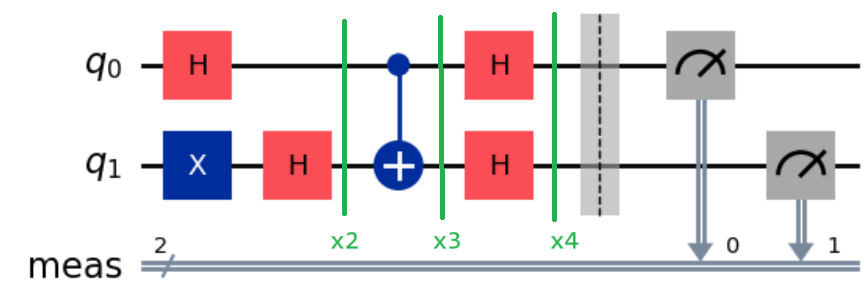

\begin{align}
| x_3 \rangle &= 0.5 | 00 \rangle - 0.5 | 01 \rangle - 0.5 | 10 \rangle + 0.5 | 11 \rangle \\
&= 0.5 \left( 1| 00 \rangle - 1 | 01 \rangle - 1 | 10 \rangle + 1 | 11 \rangle \right) \\
&= 0.5 (|0\rangle - |1\rangle) \otimes (|0\rangle - |1\rangle)
\end{align}

Hence, when we apply Hadamard to each qubit, they turn to $|1\rangle \otimes |1\rangle$.

Notice that the phase from $q_1$ (the controlled) has been transferred to $q_0$ (the controller).



Recap: how did it go?

\begin{align}
| x_2 \rangle &= 0.5 (|0\rangle + |1\rangle) (|0\rangle - |1\rangle) \\
&= 0.5 (|00\rangle - |01\rangle + |10\rangle - |11\rangle)
\\
| x_3 \rangle &= 0.5 (|00\rangle - |01\rangle + |11\rangle - |10\rangle) \\
&= 0.5 (|0\rangle - |1\rangle) \otimes (|0\rangle - |1\rangle) \\
&= 0.25 (|0\rangle - |1\rangle) \otimes 0.25 (|0\rangle - |1\rangle)
\\
| x_4 \rangle &= H [0.25 (|0\rangle - |1\rangle)] \otimes H [0.25 (|0\rangle - |1\rangle)] \\
&= |1\rangle \otimes |1\rangle \\
&= |11\rangle
\end{align}

# Customized gate

Gate has to be unitary transform, $\mathbf{U}$.

A matrix $\mathbf{U}$ is a unitary matrix, if
$\mathbf{U} \mathbf{U}^\dagger = \mathbf{U}^\dagger \mathbf{U} = \mathbf{I}$.

* $X_\theta = e^{-i X \theta /2} = \begin{bmatrix} \cos (\theta/2) & - i \sin (\theta/2) \\ -i \sin (\theta/2) & \cos (\theta/2) \end{bmatrix}$

* $Y_\theta = e^{-i Y \theta /2} = \begin{bmatrix} \cos (\theta/2) & - \sin (\theta/2) \\ \sin (\theta/2) & \cos (\theta/2) \end{bmatrix}$

* $Z_\theta = e^{-i Z \theta /2} = \begin{bmatrix} e^{ - i \theta/2} & 0 \\ 0 & e^{i \theta/2} \end{bmatrix}$

* Global phase, $Ph_\theta = e^{i \theta} \mathbf{I} = \begin{bmatrix} e^{i \theta} & 0 \\ 0 & e^{i \theta} \end{bmatrix}$


In [ ]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

theta = -np.pi/3
# B = np.exp(-1j * X * theta/2)
c = np.cos(theta/2)
s = np.sin(theta/2)
RX = np.array([[c, -1j*s], [-1j*s, c]]) # X-rotation

theta = np.pi/4
c = np.cos(theta/2)
s = np.sin(theta/2)
RY = np.array([[c, -s], [s, c]]) # Y-rotation

theta = np.pi/4
ep = np.exp(1j*theta/2)
en = np.exp(-1j*theta/2)
RZ = np.array([[en, 0], [0, ep]]) # X-rotation


B = RX

print(B)
print(B.conjugate().T)

print(B @ B.conjugate().T)

[[0.8660254+0.j  0.       +0.5j]
 [0.       +0.5j 0.8660254+0.j ]]
[[0.8660254-0.j  0.       -0.5j]
 [0.       -0.5j 0.8660254-0.j ]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [ ]:
import qiskit.quantum_info as qi

Bgate = qi.Operator(B)

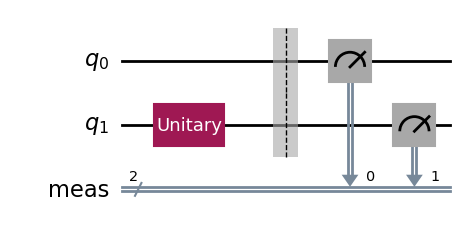

In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Create a circuit
qc = QuantumCircuit(2)

# qc.h(0)
# qc.cx(0, 1)

qc.append(Bgate, [1])

qc.measure_all()
qc.draw('mpl')

{'10': 260, '00': 764}


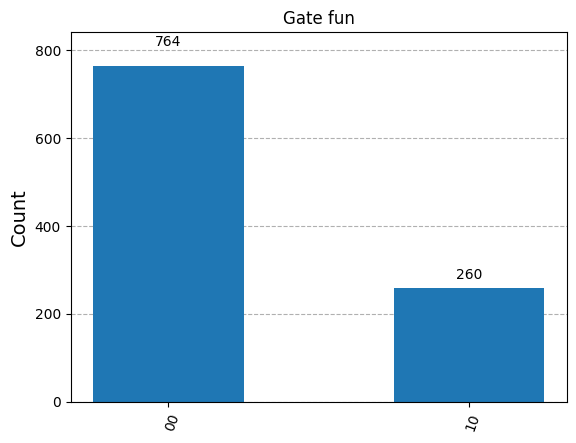

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

Note: Qiskit has an off-the-shelf rotation operator, which may be more efficient than what we customize here.
(Or, it may be just the same, only a job of transpiler to convert ours to the standard ones.)

# Superdense codes

* Transfer classical information with a **quantum channel**

* Transmit **2 classical bits** with a **single qubit**!

  We need
  * 2 parties who want to communicate
  * 2 entangled qubits: each has half of the entangled pair
  * A quantum channel to transmit a qubit
  * A 2-bit (secret) message

Step 1: Create an entangle pair of qubits


Step 2: Distribut entangled qubits to Alice and Bob


Step 3: Alice applies gate according to her message

> | Message | 00 | 01 | 10 | 11 |
> |--- |--- |--- |--- |--- |
> | Gate | None | Z | Not(X) | NOT (X) and Z |


Hence, the entangled pair will be:

> | bits   | 00 ..............................| 01 .............................. | 10 .............................. | 11 .............................. |
> |---     |--- |--- |--- |--- |
> | qubits: ba | $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ | $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$ | $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ | $\frac{1}{\sqrt{2}}(-|01\rangle + |10\rangle)$ |

Step 4: Alice sends her qubit to Bob, Bob inverts the entanglement: CNOT(a, b); H(a).

> | qubits: ba | $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ | $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$ | $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ | $\frac{1}{\sqrt{2}}(-|01\rangle + |10\rangle)$ |
> |--- |--- |--- |--- |--- |
> | CNOT(b,a) | $\frac{1}{\sqrt{2}} (|00\rangle + |01\rangle)$ | $\frac{1}{\sqrt{2}}(|00\rangle - |01\rangle)$ | $\frac{1}{\sqrt{2}}(|11\rangle + |10\rangle)$ | $\frac{1}{\sqrt{2}}(-|11\rangle + |10\rangle)$ |
> | H(a) | $|00\rangle$ | $|01\rangle$ | $|10\rangle$ | $|11\rangle $ |

Step 5: Bob reads the qubits.

Caveat!
A quantum channel may not be robust enough to outperform the speed and reliability of classical channel.

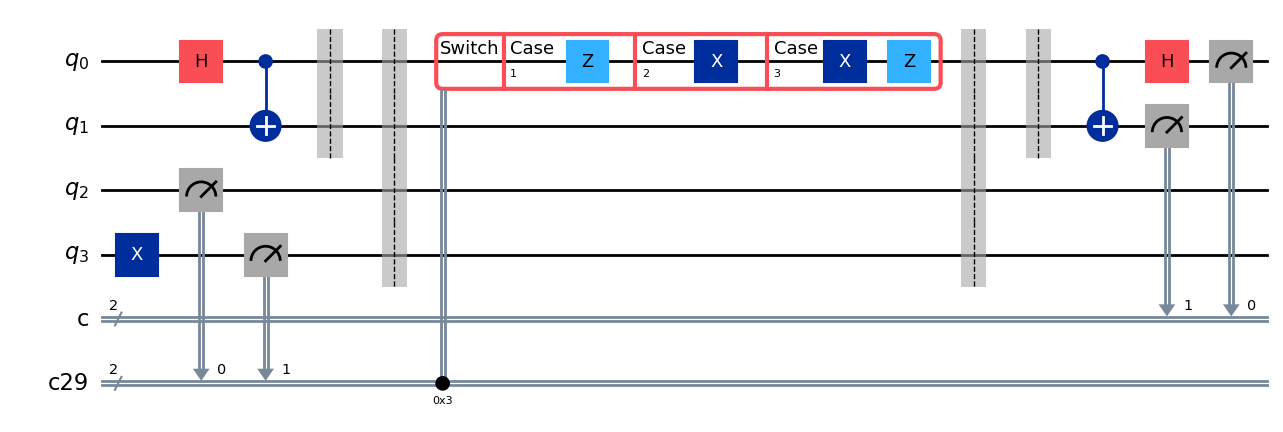

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Create a circuit

qc = QuantumCircuit(4, 2)

# Alice's message

# 00

# 01
# qc.x(2)

# 10
qc.x(3)

# 11
# qc.x([3,2])

cr = ClassicalRegister(2)
qc.add_register(cr)
qc.measure([2,3], cr)


# Step 1: create an entangled pair
qc.h(0)
qc.cx(0,1)

qc.barrier([0,1])
# Step 2: qubit 0 to Alice, qubit 1 to Bob

# Step 3: Alice applies gate
qc.barrier()

with qc.switch(cr) as case:
    with case(1):
        qc.z(0)
    with case(2):
        qc.x(0)
    with case(3):
        qc.x(0)
        qc.z(0)

qc.barrier()

# Step 4: Bob gets Alice's qubit and applies gates.
qc.barrier([0,1])

qc.cx(0, 1)
qc.h(0)

# Step 5: Bob reads qubits.

qc.measure([1,0], [1, 0])
qc.draw('mpl')

{'10 10': 1024}


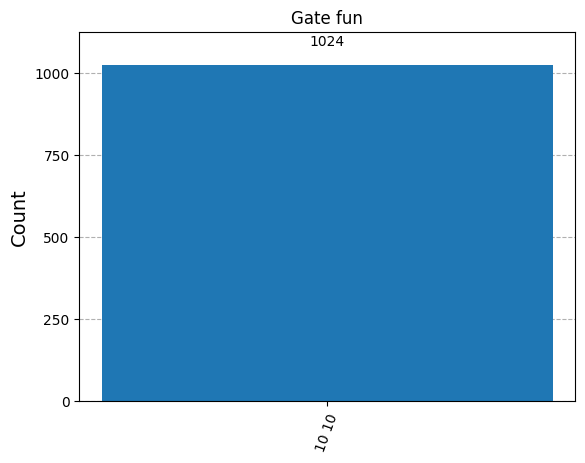

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

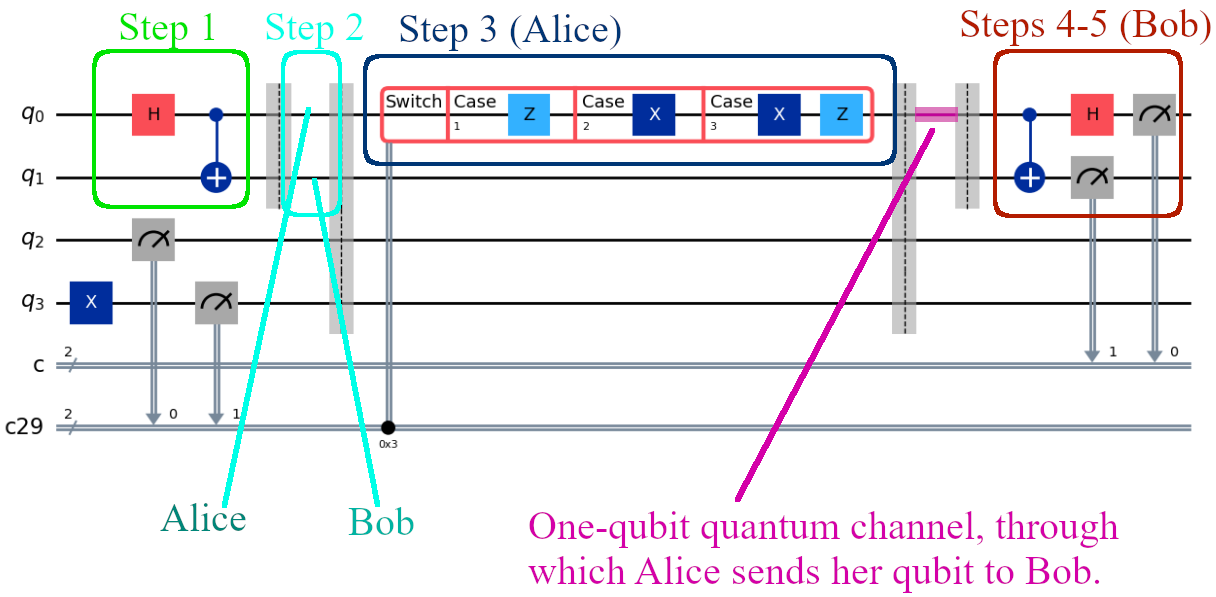

# Quantum teleportation

How to send a qubit using classical channel.

It is:

* NOT moving matter from one point to another via dematerialization/materialization

* NOT traveling forward or backward in time

* NOT traveling faster than the speed of light



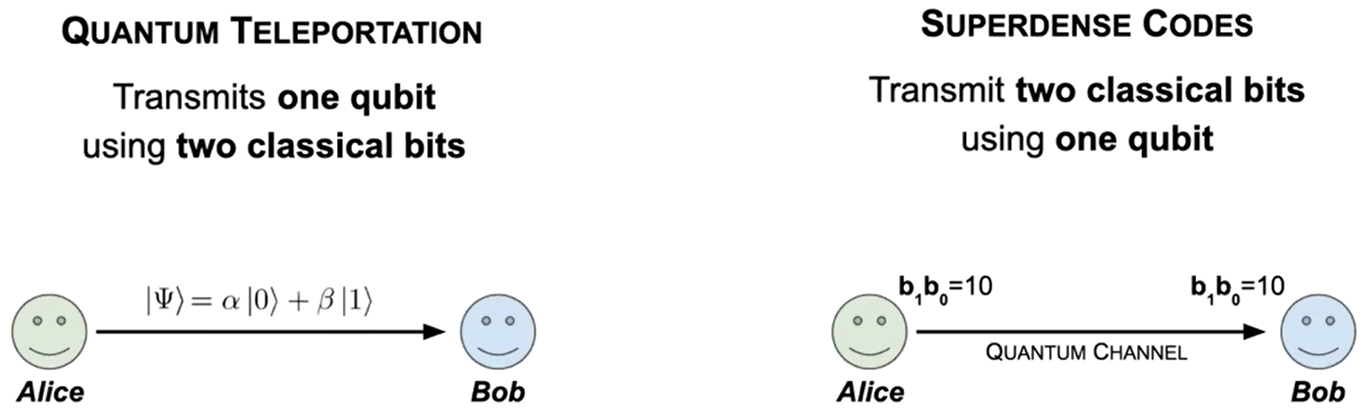

We need

* Two entangled qubits: each party has one half of the pair

* A message qubit

* A classical communication channel between both parties for the transmission of 2 classical bits

Step 1: Create an entangled pair of qubits

> State
>
> $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

Step 2: Distribute them to Alice and Bob


Step 3: Alice entangles her message qubit to her half of the Alice-Bob pair: CNOT(m, a) where m is the message qubit

> State
> \begin{align}
& (\alpha |0 \rangle + \beta |1 \rangle) \oplus \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\
=& \frac{1}{\sqrt{2}}(\alpha |00\underline{0}\rangle + \alpha |11\underline{0}\rangle + \beta |01\underline{1}\rangle + \beta |10\underline{1}\rangle)
\end{align}

Step 4: Alice applies H to the message qubit

> State
> \begin{align}
=& \frac{1}{2}(\alpha |00\underline{0}\rangle + \alpha |11\underline{0}\rangle - \beta |01\underline{1}\rangle - \beta |10\underline{1}\rangle + \\
\;& \alpha |00\underline{1}\rangle + \alpha |11\underline{1}\rangle + \beta |01\underline{0}\rangle + \beta |10\underline{0}\rangle)
\\
=& \frac{1}{2}(\alpha (|00\underline{0}\rangle + |11\underline{0}\rangle
+ |00\underline{1}\rangle + |11\underline{1}\rangle
) \\
\;&
\beta (|01\underline{0}\rangle + |10\underline{0}\rangle - |01\underline{1}\rangle - |10\underline{1}\rangle)
\end{align}

Step 5: Alice measures both of her qubits

> Alice's readout
>
> \begin{align}
\frac{1}{2}(\alpha (|0\underline{00}\rangle + |1\underline{10}\rangle
+ |0\underline{01}\rangle + |1\underline{11}\rangle
) \\
+ \beta (|0\underline{10}\rangle + |1\underline{00}\rangle - |0\underline{11}\rangle - |1\underline{01}\rangle)
\end{align}


Step 6: Alice sends her readout to Bob using 2 classical bits.

> Alice's readout:
>
> * ```00```: Bob's state $\alpha |0 \rangle + \beta | 1 \rangle$.
>
> * ```01```: Bob's state $\alpha |0 \rangle - \beta | 1 \rangle$.
>
> * ```10```: Bob's state $\alpha |1 \rangle + \beta | 0 \rangle$.
>
> * ```11```: Bob's state $\alpha |1 \rangle - \beta | 0 \rangle$.


Step 7: Bob recovers the message qubit.

* ```00```: Bob applies nothing.

* ```01```:  Bob applies Z gate.

* ```10```: Bob applies X gate.

* ```11```: Bob applies X gate, then Z gate.

Note

* Alice never knows the state of the message qubit.

* Alice and Bob destroy their entangled qubits during the process of teleportation.

* More arbitrary qubit transfer requires more distributed entanglement.

* Quantum teleportation has been experimentally demonstrated many times.

In [ ]:
# Alice's message qubit
theta = -np.pi/3
c = np.cos(theta/2)
s = np.sin(theta/2)
RX = np.array([[c, -1j*s], [-1j*s, c]]) # X-rotation
B = RX

print(B)
print(B.conjugate().T)

print(B @ B.conjugate().T)

[[0.8660254+0.j  0.       +0.5j]
 [0.       +0.5j 0.8660254+0.j ]]
[[0.8660254-0.j  0.       -0.5j]
 [0.       -0.5j 0.8660254-0.j ]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [ ]:
import qiskit.quantum_info as qi

Bgate = qi.Operator(B)

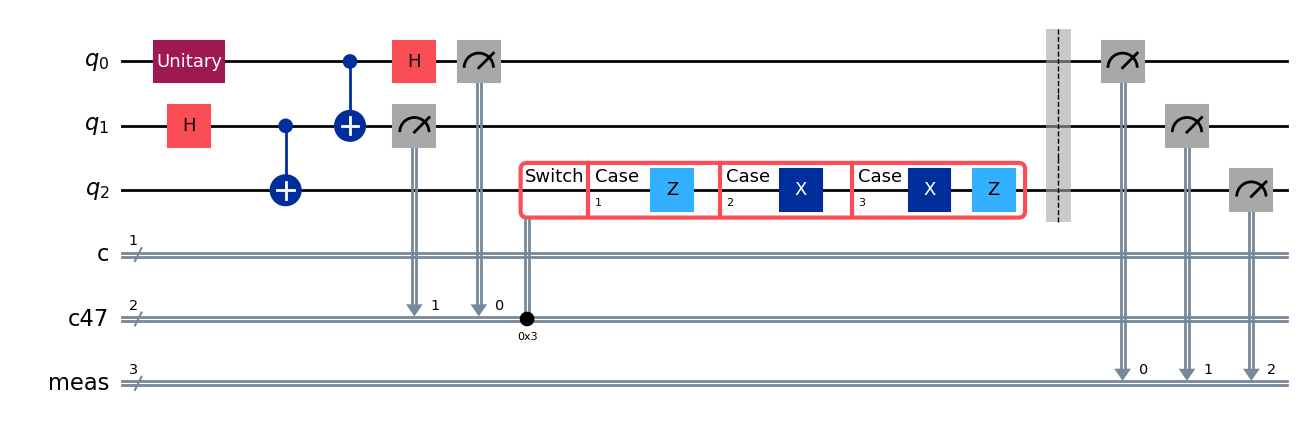

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a circuit
qc = QuantumCircuit(3, 1)

# Alice's message qubit
qc.append(Bgate, [0])


# Step 1: Entangle Alice-Bob qubits
qc.h(1)
qc.cx(1, 2)

# Step 2: Distribute entangled qubits: Alice = q1, Bob = q2

# Step 3: Alice entangles her message to her half

qc.cx(0, 1)

# Step 4: Alice applies H to the message qubit
qc.h(0)

# # Step 5: Alice measures both of her qubits
cr = ClassicalRegister(2)
qc.add_register(cr)
qc.measure([0,1], cr)

# Step 6: Alice sends her readout to Bob using 2 classical bits.

# Step 7: Bob applies gates to restore the message qubit.

with qc.switch(cr) as case:
    with case(1):
        qc.z(2)
    with case(2):
        qc.x(2)
    with case(3):
        qc.x(2)
        qc.z(2)

qc.measure_all()
# qc.measure([2], [2])
qc.draw('mpl')

{'111 11 0': 61, '011 11 0': 188, '001 01 0': 175, '010 10 0': 220, '101 01 0': 64, '100 00 0': 58, '000 00 0': 193, '110 10 0': 65}


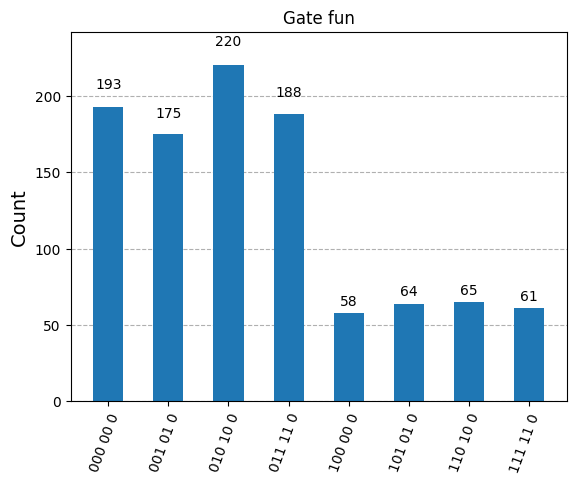

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

The problem is that we don't really know if Bob still has the intact quantum state $\alpha |0 \rangle + \beta | 1\rangle$ or
that his qubit state has collapsed when Alice measured hers.

> If it is intact, we see it at the end like this.
>
> If it has collapsed, it collapsed with probabilities according to this.
>
> Either way, we see the same result.
>
> How to design an experiment to check if it is still in quantum state?
>
> Put another H in?

## Debug with Statevector



In [ ]:
from qiskit_aer import StatevectorSimulator

# Create a circuit
qc = QuantumCircuit(3, 1)

# Alice's message qubit
qc.append(Bgate, [0])

# Step 1: Entangle Alice-Bob qubits
qc.h(1)
qc.cx(1, 2)

# Step 2: Distribute entangled qubits: Alice = q1, Bob = q2

# Step 3: Alice entangles her message to her half

qc.cx(0, 1)

# Step 4: Alice applies H to the message qubit
qc.h(0)

# # # Step 5: Alice measures both of her qubits
# cr = ClassicalRegister(2)
# qc.add_register(cr)
# qc.measure([0,1], cr)

# # Step 6: Alice sends her readout to Bob using 2 classical bits.

# # Step 7: Bob applies gates to restore the message qubit.

# with qc.switch(cr) as case:
#     with case(1):
#         qc.z(2)
#     with case(2):
#         qc.x(2)
#     with case(3):
#         qc.x(2)
#         qc.z(2)

# Transpile for simulator
simulator = StatevectorSimulator()
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()


# Get state vectors
sv = result.get_statevector()

np.around(sv, 2)

array([ 0.43+0.j  ,  0.43+0.j  ,  0.  +0.25j, -0.  -0.25j,  0.  +0.25j,
       -0.  -0.25j,  0.43+0.j  ,  0.43+0.j  ])

## Test if Bob's qubit intact

If Bob's state is intact, $|\Psi\rangle = \alpha |0 \rangle + \beta |1\rangle$,

\begin{align}
H |\Psi\rangle &= \frac{1}{\sqrt{2}}(\alpha |0 \rangle + \alpha |1 \rangle + \beta |0 \rangle - \beta |1\rangle)
\\
&= \frac{1}{\sqrt{2}}\left( (\alpha + \beta) |0 \rangle + (\alpha - \beta) |1 \rangle \right)
\end{align}

If we set $\alpha = \beta = \frac{1}{\sqrt{2}}$,
we will see $|0\rangle$ for 100\%.

But, if Bob's state has collapses,

* $H |0 \rangle = \frac{1}{\sqrt{2}}(|0 \rangle + |1 \rangle)$

* $H |1 \rangle = \frac{1}{\sqrt{2}}(|0 \rangle - |1 \rangle)$

Either way, we will see 50/50 chance.

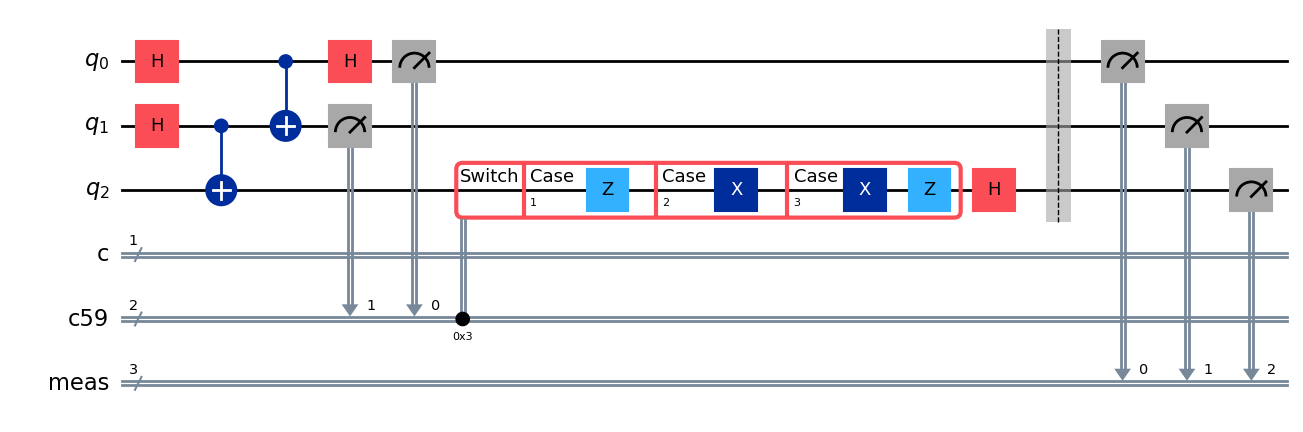

In [ ]:
# Create a circuit
qc = QuantumCircuit(3, 1)

# Alice's message qubit
# qc.append(Bgate, [0])

qc.h(0)

# Step 1: Entangle Alice-Bob qubits
qc.h(1)
qc.cx(1, 2)

# Step 2: Distribute entangled qubits: Alice = q1, Bob = q2

# Step 3: Alice entangles her message to her half

qc.cx(0, 1)

# Step 4: Alice applies H to the message qubit
qc.h(0)

# # Step 5: Alice measures both of her qubits
cr = ClassicalRegister(2)
qc.add_register(cr)
qc.measure([0,1], cr)

# Step 6: Alice sends her readout to Bob using 2 classical bits.

# Step 7: Bob applies gates to restore the message qubit.

with qc.switch(cr) as case:
    with case(1):
        qc.z(2)
    with case(2):
        qc.x(2)
    with case(3):
        qc.x(2)
        qc.z(2)

# Set qubit 2 to 0 / or do swap
# qc.cx(2,3)
# qc.cx(3,2)

# qc.h(2)

# Try collapse it
# qc.measure([2], [0])

# Apply H to qubit 2
qc.h(2)

# If we see |0> = 0, then it was intact.
# If we see 50/50, then it had collapsed.

qc.measure_all()
qc.draw('mpl')

{'000 00 0': 265, '010 10 0': 256, '011 11 0': 221, '001 01 0': 282}


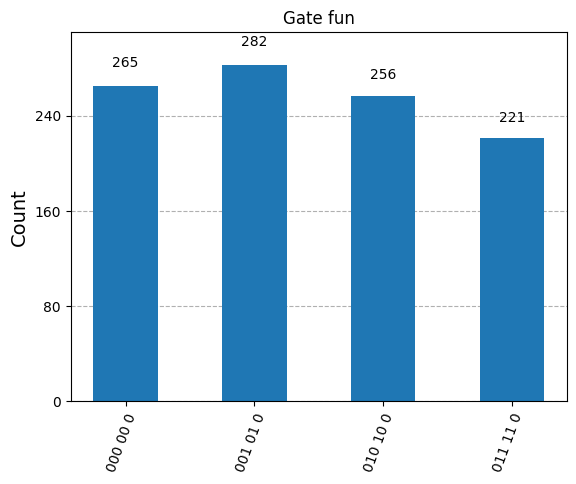

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

We see only 0's  for qubit 2.

So, the state was intact!!!

We had **quantum transportation**.

# Stern-Gerlach Experiment

In [ ]:
print(QuantumCircuit.switch.__doc__)

Create a ``switch``/``case`` structure on this circuit.

        There are two forms for calling this function.  If called with all its arguments (with the
        possible exception of ``label``), it will create a :class:`.SwitchCaseOp` with the given
        case structure.  If ``cases`` (and ``qubits`` and ``clbits``) are *not* passed, then this
        acts as a context manager, which will automatically build a :class:`.SwitchCaseOp` when the
        scope finishes.  In this form, you do not need to keep track of the qubits or clbits you are
        using, because the scope will handle it for you.

        Example usage::

            from qiskit.circuit import QuantumCircuit, ClassicalRegister, QuantumRegister
            qreg = QuantumRegister(3)
            creg = ClassicalRegister(3)
            qc = QuantumCircuit(qreg, creg)
            qc.h([0, 1, 2])
            qc.measure([0, 1, 2], [0, 1, 2])

            with qc.switch(creg) as case:
                with case(0):
       

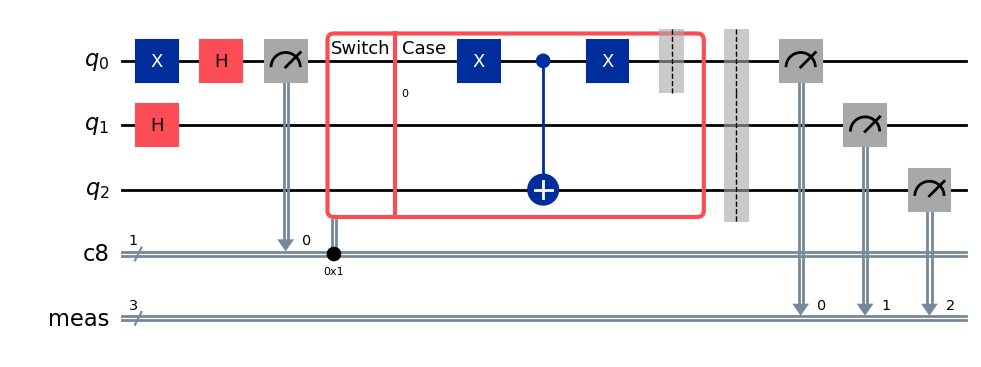

In [ ]:
# Perpendicular unblocked analyzer loop: Hadamard
# Perpendicular blocked analyzer loop: Hadamard + Measure + blockage (c_if)

from qiskit import QuantumCircuit, ClassicalRegister

qc = QuantumCircuit(3)
qc.x(0)  # |1> = up

# Simulate the Stern-Gerlach apparatus
cr = ClassicalRegister(1)
qc.add_register(cr)
qc.measure(0, cr)

# Selective removal of qubits
with qc.switch(cr) as case:
    with case(0):
        qc.x(0)
        qc.cx(0, 2)  # qubit 2: count the blockages
        qc.x(0)
        qc.barrier(0)

qc.measure_all()
qc.draw('mpl')


{'011 1': 236, '001 1': 249, '100 0': 262, '110 0': 277}


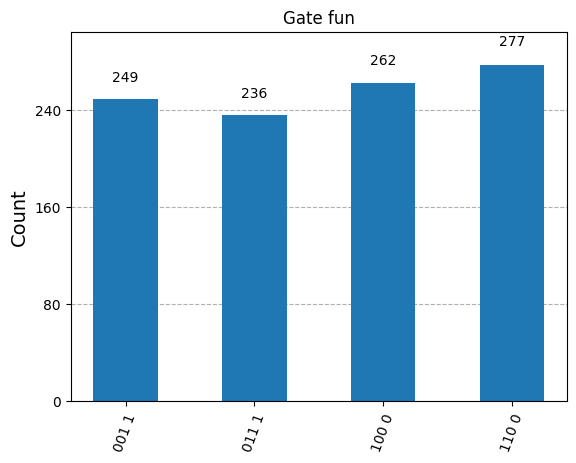

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

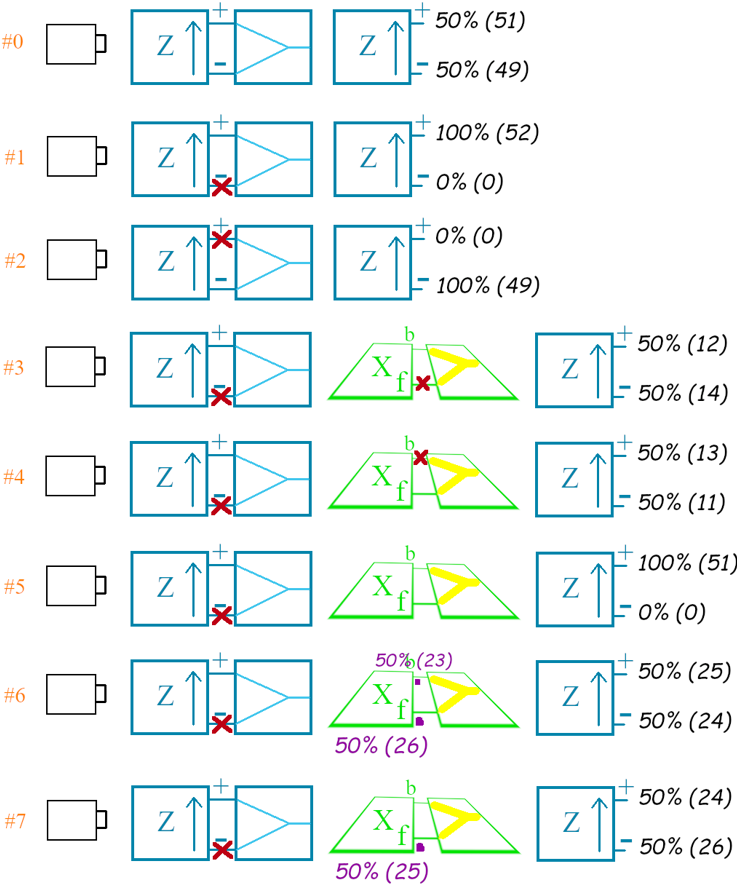

## SG Lab 3

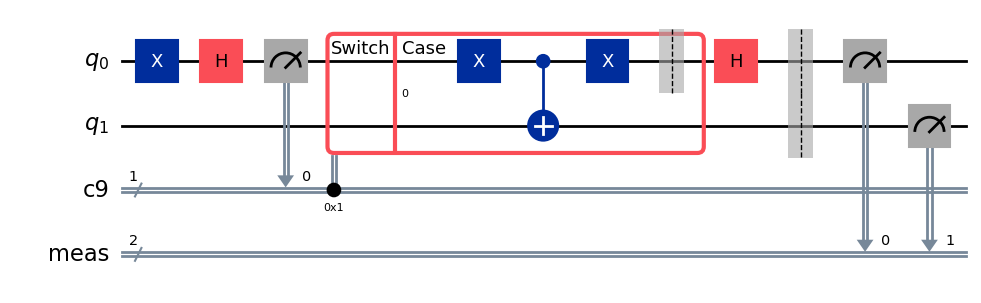

In [ ]:
qc = QuantumCircuit(2)
qc.x(0)  # |1> = up

# SG: X
qc.h(0)

# One-side blockage
cr = ClassicalRegister(1)
qc.add_register(cr)
qc.measure(0, cr)

# Selective removal of qubits
with qc.switch(cr) as case:
    with case(0):
        qc.x(0)
        qc.cx(0, 1)  # qubit 1: count the blockages
        qc.x(0)
        qc.barrier(0)

qc.h(0)

qc.measure_all()
qc.draw('mpl')


{'01 1': 266, '11 0': 259, '00 1': 245, '10 0': 254}


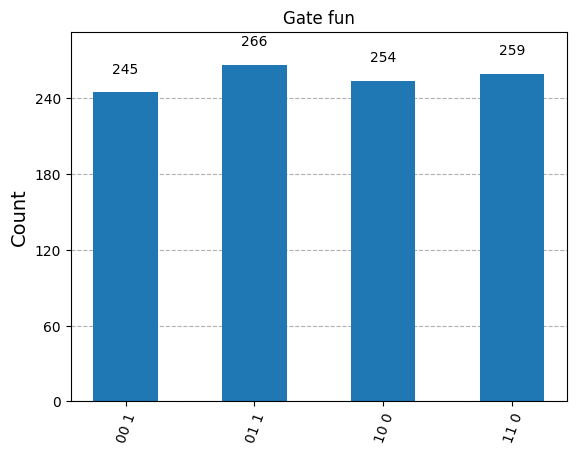

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

## SG Lab 5

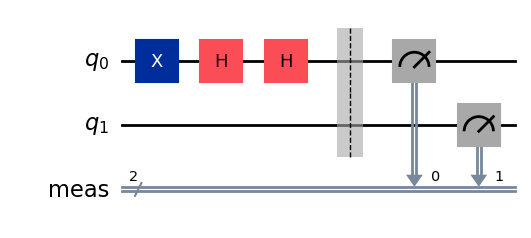

In [ ]:
qc = QuantumCircuit(2)
qc.x(0)  # |1> = up

# SG: X
qc.h(0)

# One-side blockage
# cr = ClassicalRegister(1)
# qc.add_register(cr)
# qc.measure(0, cr)

# # Selective removal of qubits
# with qc.switch(cr) as case:
#     with case(0):
#         qc.x(0)
#         qc.cx(0, 1)  # qubit 1: count the blockages
#         qc.x(0)
#         qc.barrier(0)

qc.h(0)

qc.measure_all()
qc.draw('mpl')


{'01': 1024}


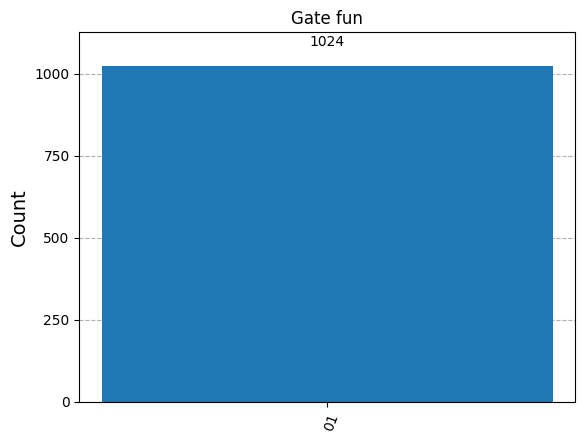

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

## SG Lab 6

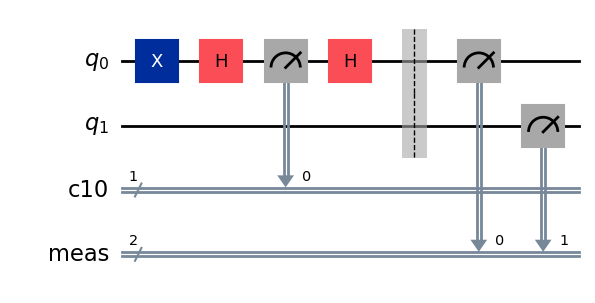

In [ ]:
qc = QuantumCircuit(2)
qc.x(0)  # |1> = up

# SG: X
qc.h(0)

# Sensor
cr = ClassicalRegister(1)
qc.add_register(cr)
qc.measure(0, cr)

# # Selective removal of qubits
# with qc.switch(cr) as case:
#     with case(0):
#         qc.x(0)
#         qc.cx(0, 1)  # qubit 1: count the blockages
#         qc.x(0)
#         qc.barrier(0)

qc.h(0)

qc.measure_all()
qc.draw('mpl')


{'00 0': 261, '01 0': 256, '01 1': 263, '00 1': 244}


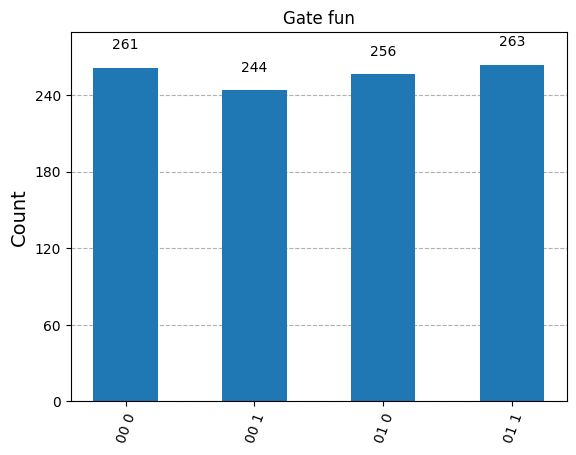

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

# Play

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ab47b34a24b4669c00994e2c30c2f836d4bbc29827390dfbf5a48ba4eeda32eb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.3 MB/s eta 0:00:00


## Play 1

In [ ]:
# Alice's message qubit
theta = -np.pi/4
c = np.cos(theta/2)
s = np.sin(theta/2)
RX = np.array([[c, -1j*s], [-1j*s, c]]) # X-rotation
B = RX

print(B)
print(B.conjugate().T)

print(B @ B.conjugate().T)

[[0.92387953+0.j         0.        +0.38268343j]
 [0.        +0.38268343j 0.92387953+0.j        ]]
[[0.92387953-0.j         0.        -0.38268343j]
 [0.        -0.38268343j 0.92387953-0.j        ]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [ ]:
import qiskit.quantum_info as qi

Bgate = qi.Operator(B)

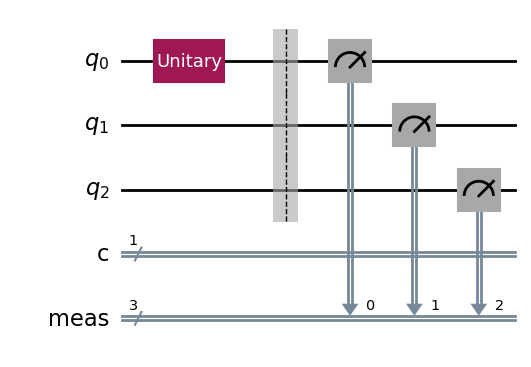

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a circuit
qc = QuantumCircuit(3, 1)

# Alice's message qubit
qc.append(Bgate, [0])

qc.measure_all()
qc.draw('mpl')

In [ ]:
m = B @ np.array([[1],[0]])
print(f"{m=}")

print(f"Probabilities: 0 :{np.abs(m[0,0])**2} ; 1 : {np.abs(m[1,0])**2}")

m=array([[0.92387953+0.j        ],
       [0.        +0.38268343j]])
Probabilities: 0 :0.8535533905932737 ; 1 : 0.14644660940672624


{'001 0': 157, '000 0': 867}


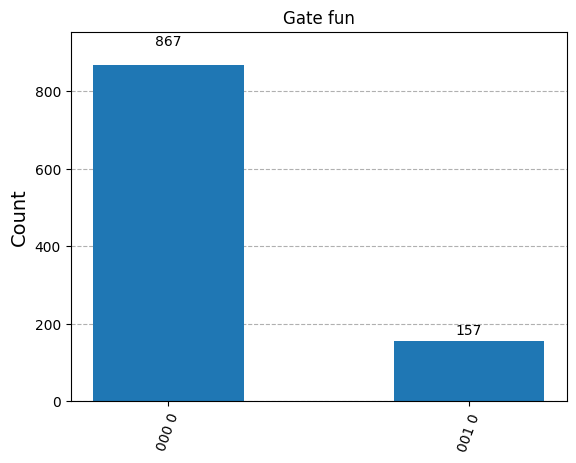

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

## Play 2

If we want the state to have 0.7 probability of $|0\rangle$
and we use rotation around Y-axis,
what angle should we rotate?

Rotation around Y-axis has its operator:

\begin{align}
R_\theta = \begin{bmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
\sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}
\end{align}

If we start with the ground state $[1, 0]^T$, the transformed state will be:

$|\psi \rangle = \begin{bmatrix}
\cos(\theta/2) \\
\sin(\theta/2)
\end{bmatrix}$

Hence, after measurement, probability of being in the ground state is $\cos^2(\theta/2)$.

Therefore,
\begin{align}
p &= \cos^2(\theta/2) \\
\theta &= 2 \cos^{-1} \sqrt{p}
\end{align}

In [ ]:
p0 = 0.7
theta = 2 * np.arccos(np.sqrt(p0))
print(f"{theta=}")

c = np.cos(theta/2)
s = np.sin(theta/2)
RY = np.array([[c, -s], [s, c]]) # Y-rotation

B = RY

print(B)
print(B.conjugate().T)

print(B @ B.conjugate().T)

m = B @ np.array([[1],[0]])
print(f"\n{m=}")

print(f"Probabilities: 0 :{np.abs(m[0,0])**2} ; 1 : {np.abs(m[1,0])**2}")

theta=1.1592794807274085
[[ 0.83666003 -0.54772256]
 [ 0.54772256  0.83666003]]
[[ 0.83666003  0.54772256]
 [-0.54772256  0.83666003]]
[[1.00000000e+00 1.79581951e-17]
 [1.79581951e-17 1.00000000e+00]]

m=array([[0.83666003],
       [0.54772256]])
Probabilities: 0 :0.7000000000000001 ; 1 : 0.29999999999999993


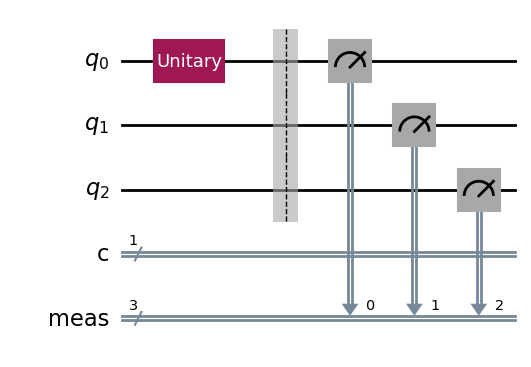

In [ ]:
Bgate = qi.Operator(B)

# Create a circuit
qc = QuantumCircuit(3, 1)

# Alice's message qubit
qc.append(Bgate, [0])

qc.measure_all()
qc.draw('mpl')

{'001 0': 311, '000 0': 713}


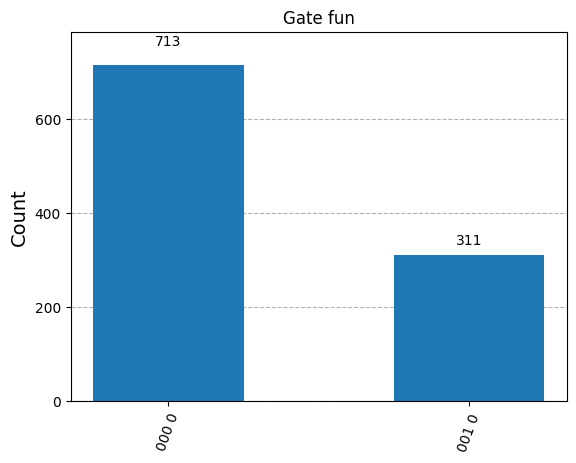

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Gate fun')

## Play 3

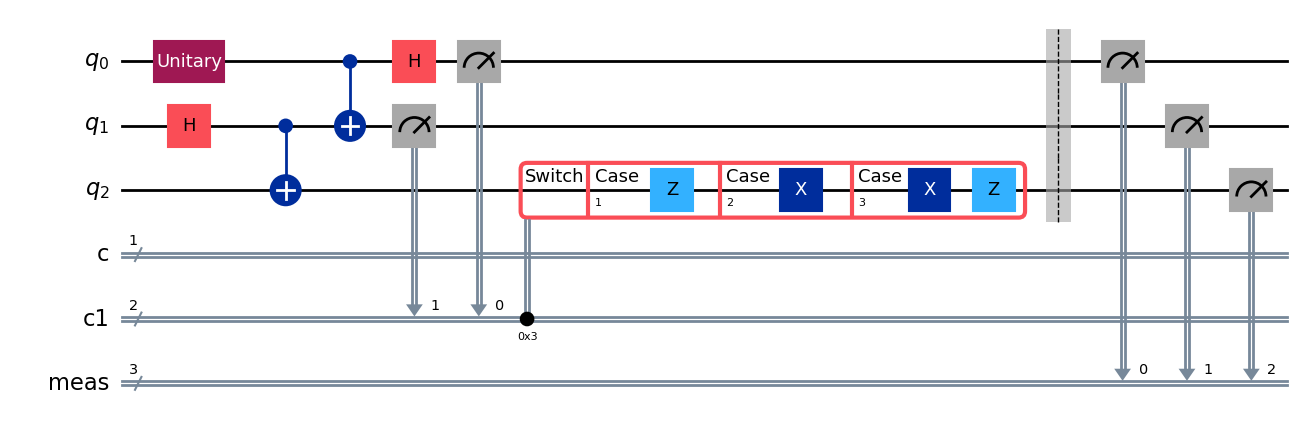

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a circuit
qc = QuantumCircuit(3, 1)

# Alice's message qubit
qc.append(Bgate, [0])

# Step 1: Entangle Alice-Bob qubits
qc.h(1)
qc.cx(1, 2)

# Step 2: Distribute entangled qubits: Alice = q1, Bob = q2

# Step 3: Alice entangles her message to her half

qc.cx(0, 1)

# Step 4: Alice applies H to the message qubit
qc.h(0)

# # Step 5: Alice measures both of her qubits
cr = ClassicalRegister(2)
qc.add_register(cr)
qc.measure([0,1], cr)

# Step 6: Alice sends her readout to Bob using 2 classical bits.

# Step 7: Bob applies gates to restore the message qubit.

with qc.switch(cr) as case:
    with case(1):
        qc.z(2)
    with case(2):
        qc.x(2)
    with case(3):
        qc.x(2)
        qc.z(2)

qc.measure_all()
qc.draw('mpl')

In [ ]:
# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)
# circ.draw('mpl')

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)

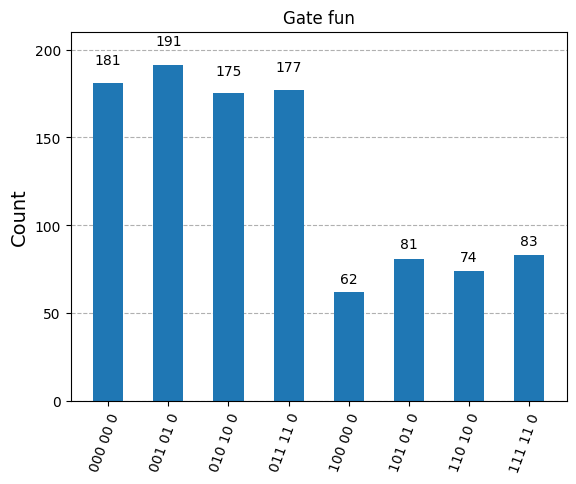

In [ ]:
plot_histogram(counts, title='Gate fun')

{'0': 724, '1': 300}


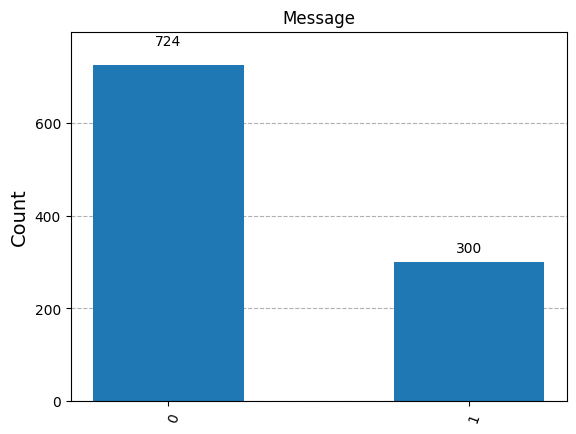

In [ ]:
Message = {'0': 0, '1': 0}
for k in counts:
    if k[0] == '0':
        Message['0'] += counts[k]
    else:
        Message['1'] += counts[k]

print(Message)

plot_histogram(Message, title='Message')

# Appendix

src: U Chicago's Quantum Computing 2021 on EdX



## Qubit notation

A qubit state $| \psi \rangle$ with probability amplitude $\alpha$ and $\beta$ can be represented in

* Bra-Ket Notation: $| \psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle$

* Vector Notation: $| \psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$

* Computation basis:

$| 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$
and
$| 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

* Hadarmard basis

$| + \rangle = \frac{1}{\sqrt{2}}(| 0 \rangle + | 1 \rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

and

$| - \rangle = \frac{1}{\sqrt{2}}(| 0 \rangle - | 1 \rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$

* Two qubits: computational basis


$| 00 \rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$
and
$| 01 \rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$

and

$| 10 \rangle = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}$
and
$| 11 \rangle = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$


* Two qubits, entangled (Bell state basis)

$| \Phi^+ \rangle = \frac{1}{\sqrt{2}}(| 00 \rangle + | 11 \rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix}$
and
$| \Phi^- \rangle = \frac{1}{\sqrt{2}}(| 00 \rangle - | 11 \rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ -1 \end{bmatrix}$

and

$| \Psi^+ \rangle = \frac{1}{\sqrt{2}}(| 01 \rangle + | 10 \rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \end{bmatrix}$
and
$| \Psi^- \rangle = \frac{1}{\sqrt{2}}(| 01 \rangle - | 10 \rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ -1 \\ 0 \end{bmatrix}$

## Mathematical symbols and operations

* $| v \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$ : Ket, a column vector in bra-ket (Dirac) notation.

* $\langle v | = \begin{bmatrix} \alpha^\ast & \beta^\ast \end{bmatrix}$ Bra, a row vector in bra-ket (Dirac) notation.

  Complex conjugate $a^\ast = a_1 - i a_2$ when $a = a_1 + i a_2$ and $i = \sqrt{-1}$.



* CNOT, $\oplus$

  $\text{CNOT}(q_0, q_1)$: qubit 0 controls qubit 1 and qubit 1 after gate operation $q_1'$ will be:

  * $q_1, q_0$: ```00```: $q_1' = 0$.
  * $q_1, q_0$: ```01```: $q_1' = 1$.
  * $q_1, q_0$: ```10```: $q_1' = 1$.
  * $q_1, q_0$: ```11```: $q_1' = 0$.    

  Notice: that it is XOR in digital logic.

* Tensor product, $\otimes$, combines vectors and matrices.

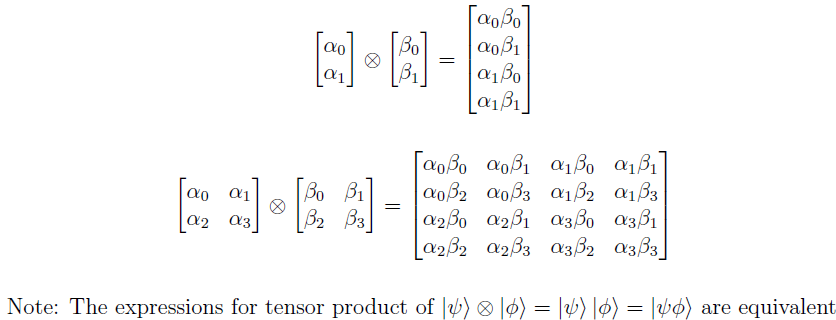

* Adjoint $U^\dagger$: conjugat transpose of $U$

  E.g.,
  \begin{align}
  U^\dagger =
  \begin{bmatrix}
  u_{11}^\ast & u_{21}^\ast \\
  u_{12}^\ast & u_{22}^\ast
  \end{bmatrix}
  \end{align}

  when

  \begin{align}
  U = \begin{bmatrix}
  u_{11} & u_{12} \\
  u_{21} & u_{22}
  \end{bmatrix}
  \end{align}

  Note: $|v\rangle^\dagger = \langle v |$.

* $|c|$: Magnitude, absolute, or modulus.
  $|c| = \sqrt{ c_1^2 + c_2^2 }$ for $c = c_1 + i c_2$.

* $|c|^2 = c^\ast c$.

## Terms

* Hamiltonian: total energy, $H$

  It is a concept using in Analytical Mechanics.

  Hamiltonian $H = \text{KE} + \text{PE}$ where $\text{KE}$ and $\text{PE}$ are kinetic and potential energies.




* Hamiltonian operator: energy operator, $\hat{H}$ in the RHS of Schrödinger equation.

  * Hamiltonian operator is derived from Hamiltonian, but it is an operator. It is supposed to operated on the quantum state.

  $$i \hbar \frac{\partial | \Psi \rangle}{\partial t} = \hat{H} | \Psi \rangle$$

  > Recall:
  >
  > \begin{align}
  \underbrace{\hbar \omega}_{\text{Photon energy}} &= \underbrace{\frac{\hbar^2 k^2}{2 m} + V}_{\text{Hamiltonian}} \\
  \hbar \underbrace{i \frac{1}{\Psi} \frac{\partial \Psi}{\partial t} }_{\omega}
  &= \frac{\hbar^2}{2 m} \underbrace{\left(-\frac{1}{\Psi} \frac{\partial^2 \Psi}{\partial x^2} \right)}_{k^2} + V \\
\underbrace{i \hbar \frac{1}{\Psi} \frac{\partial \Psi}{\partial t}}_{\text{Photon energy}}
  &= \underbrace{-\frac{1}{\Psi} \frac{\hbar^2}{2 m} \frac{\partial^2 \Psi}{\partial x^2} + V}_{\text{Hamiltonian}}  \\
  \underbrace{i \hbar \frac{\partial \Psi}{\partial t}}_{\text{Not energy}}
  &= \underbrace{- \frac{\hbar^2}{2 m} \frac{\partial^2 \Psi}{\partial x^2} + V \Psi}_{\text{Not Hamiltonian}} \\
  i \hbar \frac{\partial \Psi}{\partial t}
  &= \underbrace{\left(- \frac{\hbar^2}{2 m} \frac{\partial^2 }{\partial x^2} + V\right)}_{\text{Operator}} \Psi \\
  \end{align}
  > Call the operator, "Hamiltonian operator".


* Unitary matrix: $U$ is unitary if $U^\dagger U = U U^\dagger = I$.

> Solution to Schrödinger equation can be simplified to unitary transformation.
>
> $$i \hbar \frac{\partial | \Psi \rangle}{\partial t} = \hat{H}  | \Psi \rangle$$
>
> Solution:
>
> $$| \Psi(t) \rangle = | \Psi(0) \rangle e^{-i \frac{\hat{H}}{\hbar} t}$$.
>
> The matrix exponential $e^{-i \frac{\hat{H}}{\hbar} t}$ is unitary and evolution of the state can be viewed as unitary transformation:
>
> $$| \Psi(t) \rangle = U(t) | \Psi(0) \rangle .$$
>
> > Given $U \equiv e^{-i \frac{\hat{H}}{\hbar} t}$,
> >
> > * $U^\dagger = e^{i \frac{\hat{H}}{\hbar} t}$
> >
> > Hence, $U U^\dagger = U^\dagger U = e^{\mathbf{0}} = \mathbf{I}$.
> >
> > > Matrix exponential
> > >
> > > $$e^X = \sum_{k=0}^\infty \frac{1}{k!} X^k = \lim_{k \rightarrow \infty} \left( \mathbf{I} + \frac{X}{k}\right)^k$$
> > >
> > > \begin{align}
e^\mathbf{0} &= \lim_{k \rightarrow \infty} \left( \mathbf{I} + \frac{\mathbf{0}}{k}\right)^k \\
&= \lim_{k \rightarrow \infty} \left( \mathbf{I}\right)^k = \mathbf{I}
\end{align}




* Hermitian: self adjoint, i.e., $U$ is hermitian if $U = U^\dagger$.

  * Hermitian operator must have real eigenvalues

    > Given Hermitian operator $\hat{O}$ in
    >
    > $$\langle \psi | \hat{O} | \psi \rangle = \langle \psi | \hat{O} \psi \rangle = \langle \hat{O}^\dagger \psi  | \psi \rangle = \langle \hat{O} \psi  | \psi \rangle$$
    >
    > If $| \psi \rangle$ is an eigenket of $\hat{O}$ with eigenvalue $\lambda$,
    >
    > $$\langle \psi | \lambda \psi \rangle = \langle \lambda \psi | \psi \rangle$$
    >
    > > Note:
    > > * $| \lambda \psi \rangle = \lambda | \psi \rangle$.
    > > * $\langle \lambda \psi | = \lambda^\ast \langle \psi |$.
    >
    > Therefore,
    >
    > $$\lambda \langle \psi | \psi \rangle = \lambda^\ast \langle \psi | \psi \rangle$$
    >
    > This can be possible only when $\lambda =\lambda^\ast$ and that is $\lambda$ (the eigenvalue) must be real.

  * Eigenfunctions of a Hermitian operator with different eigenvalues must be orthogonal.

    > Consider
    >
    > $$\langle \phi | \hat{O} | \psi \rangle = \langle \phi | \hat{O} \psi \rangle = \langle \hat{O}^\dagger \phi   | \psi \rangle = \langle \hat{O} \phi   | \psi \rangle$$
    >
    > If $| \psi \rangle$ is an eigenket of $\hat{O}$ with eigenvalue $\lambda_\psi$ and
    > $| \phi \rangle$ is an eigenket of $\hat{O}$ with eigenvalue $\lambda_\phi$,
    > $$\langle \phi | \hat{O} | \psi \rangle = \langle \phi | \lambda_\psi \psi \rangle = \langle \lambda_\phi \phi | \psi \rangle$$
    >
    > Pulling the eigenvalues out gives
    >
    > $$\lambda_\psi \langle \phi | \psi \rangle = \lambda_\phi^\ast \langle \phi | \psi \rangle$$
    >
    > But, eigenvalues of Hermitian operators are real.
    >
    > \begin{align}
    \lambda_\psi \langle \phi | \psi \rangle &= \lambda_\phi \langle \phi | \psi \rangle \\
    \left(\lambda_\psi - \lambda_\phi\right) \langle \phi | \psi \rangle &= 0
    \end{align}
    >
    > So, it is either $\left(\lambda_\psi - \lambda_\phi\right) = 0$ or $\langle \phi | \psi \rangle = 0$ or both.
    >
    > That is, $| \psi \rangle$ and $| \phi \rangle$ are orthogonal if they have different eigenvalues.

 * The eigenfunctions of a **Hermitian operator** form a complete set. That is, any function in the abstract vector space containing the eigenfunctions of a Hermitian operator may be made up of a linear combination of those eigenfunctions.   


(src: Fleisch's A student's guide to Schrödinger equation)


# The end